In [1]:
file_path='/content/drive/MyDrive/colab_datasets/LP3-pratical-datasets/prac6/archive (1).zip'
from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
import pandas as pd
df = pd.read_csv('/content/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [5]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

From your column list:

['Email No.', 'the', 'to', 'ect', 'and', ..., 'Prediction']


That means:

Each word (like ‘the’, ‘to’, ‘and’, ‘you’, …) is a feature/column.

The value in each column = how many times that word appears in that email (like a Bag-of-Words or TF-IDF representation).

The target/output column is 'Prediction' — this tells whether the email is Spam (1) or Not Spam (0).

✅ So — no text processing or TF-IDF vectorization is needed!
The dataset is already ready for modeling.

In [6]:
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [9]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [10]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8628019323671497
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035



🔹 Precision

Of all emails the model predicted as Spam (or Not Spam), how many were actually that class?

Precision
=
𝑇
𝑟
𝑢
𝑒
𝑃
𝑜
𝑠
𝑖
𝑡
𝑖
𝑣
𝑒
𝑠
𝑇
𝑟
𝑢
𝑒
𝑃
𝑜
𝑠
𝑖
𝑡
𝑖
𝑣
𝑒
𝑠
+
𝐹
𝑎
𝑙
𝑠
𝑒
𝑃
𝑜
𝑠
𝑖
𝑡
𝑖
𝑣
𝑒
𝑠
Precision=
TruePositives+FalsePositives
TruePositives
	​

Class	Precision	Meaning
0 (Not Spam)	0.93	When KNN said “Not Spam,” it was right 93% of the time.
1 (Spam)	0.73	When KNN said “Spam,” it was right 73% of the time — meaning 27% false positives.

🧠 Interpretation:
Model sometimes marks normal emails as spam (false positives).

🔹 Recall (Sensitivity)

Of all actual Spam emails, how many did the model successfully detect?

Recall
=
𝑇
𝑟
𝑢
𝑒
𝑃
𝑜
𝑠
𝑖
𝑡
𝑖
𝑣
𝑒
𝑠
𝑇
𝑟
𝑢
𝑒
𝑃
𝑜
𝑠
𝑖
𝑡
𝑖
𝑣
𝑒
𝑠
+
𝐹
𝑎
𝑙
𝑠
𝑒
𝑁
𝑒
𝑔
𝑎
𝑡
𝑖
𝑣
𝑒
𝑠
Recall=
TruePositives+FalseNegatives
TruePositives
	​

Class	Recall	Meaning
0 (Not Spam)	0.87	It correctly found 87% of actual Not-Spam emails.
1 (Spam)	0.83	It correctly detected 83% of actual Spam emails.

🧠 Interpretation:
It misses about 17% of spam emails (false negatives), but that’s still decent.

🔹 F1-score

The harmonic mean of Precision and Recall — balances both.

𝐹
1
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
F1=2×
Precision+Recall
Precision×Recall
	​

Class	F1	Meaning
0 (Not Spam)	0.90	Strong performance on Not Spam emails.
1 (Spam)	0.78	Good, but slightly weaker on Spam detection.

🧠 Interpretation:
F1 emphasizes balanced performance — since 0.78 < 0.90, KNN is better at identifying Not-Spam than Spam.

In [11]:
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM Accuracy: 0.9594202898550724
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



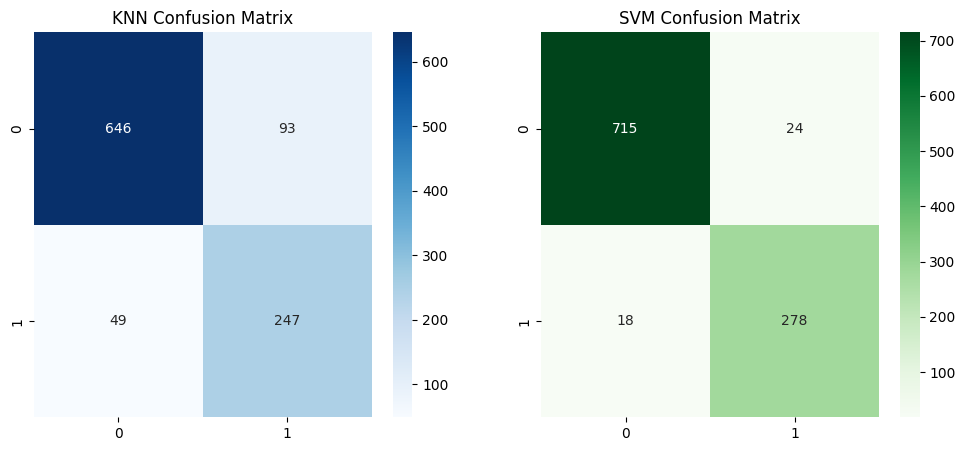

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')

plt.show()

🧩 KNN — Checks k nearest individual emails, not clusters

✅ It finds the k most similar individual training emails, not groups or clusters.

How it works here:

When you give KNN a new email, it:

Computes the distance (usually Euclidean or cosine) between this new email’s word-frequency vector and every single email in the training data.

Finds the k closest emails (the ones whose word patterns are most similar).

Looks at their labels (Spam or Not Spam).

Uses majority voting — whichever class most of those k neighbors belong to becomes the prediction.

🧠 Example
Let’s say
𝑘
=
5
k=5:

Neighbor	Distance	Label
Email 47	0.22	Spam
Email 88	0.28	Spam
Email 12	0.35	Not Spam
Email 19	0.36	Spam
Email 31	0.37	Not Spam

→ Spam: 3 , Not Spam: 2 → Predicted = Spam

So it’s purely based on the labels of the 5 nearest individual points, not any predefined clusters.

📌 Clusters come into play in algorithms like K-Means, not KNN.
KNN does not form or learn clusters — it just looks around locally each time you query.

⚙️ SVM — Finds the best separating hyperplane

✅ Exactly right — it finds the optimal boundary (line or plane) between spam and non-spam emails.

How it works here:

Imagine every email as a point in a 3000-dimensional space
(each word = one dimension, and the value = frequency or TF-IDF weight).

SVM tries to:

Draw a hyperplane (a line in 2D, a plane in 3D, and so on in higher dimensions)

So that it separates spam and non-spam points as cleanly as possible

And maximizes the margin — the distance between the hyperplane and the nearest emails from both classes (called support vectors)

🧠 After training:
For a new email, SVM computes which side of that hyperplane it lies on.

One side → Spam

Other side → Not Spam